#Importing the data

In [26]:
!wget https://raw.githubusercontent.com/TejasGadi/Datathon2/main/stocks2.csv

--2022-10-09 12:44:44--  https://raw.githubusercontent.com/TejasGadi/Datathon2/main/stocks2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61475 (60K) [text/plain]
Saving to: ‘stocks2.csv.2’

stocks2.csv.2       100%[===================>]  60.03K  --.-KB/s    in 0.01s   

2022-10-09 12:44:44 (5.11 MB/s) - ‘stocks2.csv.2’ saved [61475/61475]



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("/content/stocks2.csv",parse_dates=['Date'],index_col=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-11,11028.500000,11054.799805,11011.650391,11035.700195,11035.700195,687100.0
2019-09-12,11058.299805,11081.750000,10964.950195,10982.799805,10982.799805,551400.0
2019-09-13,10986.799805,11084.450195,10945.750000,11075.900391,11075.900391,624300.0
2019-09-16,10994.849609,11052.700195,10968.200195,11003.500000,11003.500000,434500.0
2019-09-17,11000.099609,11000.099609,10796.500000,10817.599609,10817.599609,482000.0


In [29]:
df.shape

(745, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2019-09-11 to 2022-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       743 non-null    float64
 1   High       743 non-null    float64
 2   Low        743 non-null    float64
 3   Close      743 non-null    float64
 4   Adj Close  743 non-null    float64
 5   Volume     743 non-null    float64
dtypes: float64(6)
memory usage: 40.7 KB


#Handle NAN values

In [31]:
df.isna().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [32]:
df.shape

(745, 6)

In [33]:
df.shape[0]

745

In [34]:
df.isna().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-11,11028.500000,11054.799805,11011.650391,11035.700195,11035.700195,687100.0
2019-09-12,11058.299805,11081.750000,10964.950195,10982.799805,10982.799805,551400.0
2019-09-13,10986.799805,11084.450195,10945.750000,11075.900391,11075.900391,624300.0
2019-09-16,10994.849609,11052.700195,10968.200195,11003.500000,11003.500000,434500.0
2019-09-17,11000.099609,11000.099609,10796.500000,10817.599609,10817.599609,482000.0


#Sort dataframe in by dates i.e. `date` column
In case of time series data, sort the dataframe by `date` column

In [36]:
# df.sort_values(by=['Date'],inplace=True)
df.index

DatetimeIndex(['2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24',
               ...
               '2022-08-26', '2022-08-29', '2022-08-30', '2022-09-01',
               '2022-09-02', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09'],
              dtype='datetime64[ns]', name='Date', length=745, freq=None)

#Plotting the data

##1. Line chart

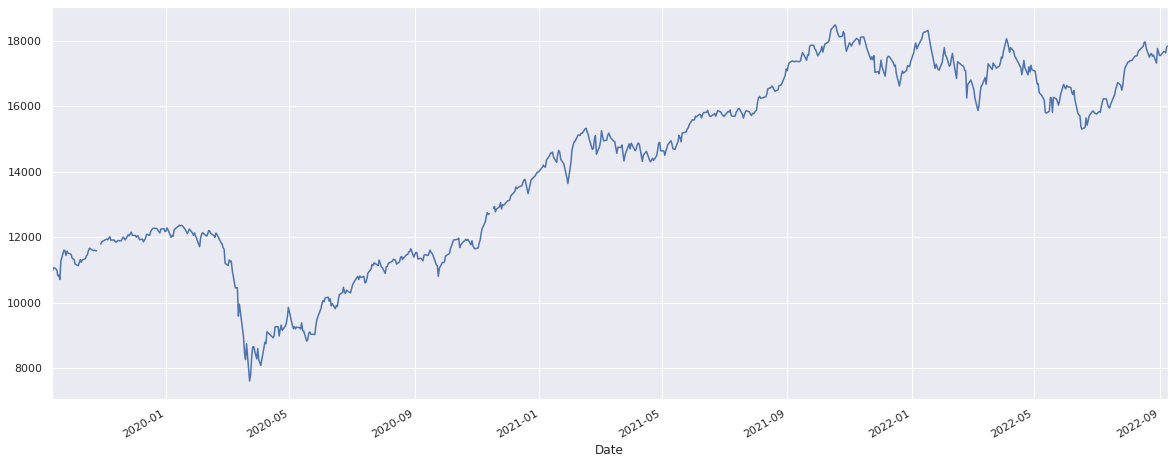

In [37]:
df['Close'].plot(figsize=(20,8)).autoscale(axis='x',tight=True)

In [38]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

##Candlestick plot

In [39]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

##Candlestick plot without Rangeslider

In [40]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

##Bars chart

In [41]:
fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
fig.show()

##Autocorrelation Plot

The Autocorrelation plot for the data is:


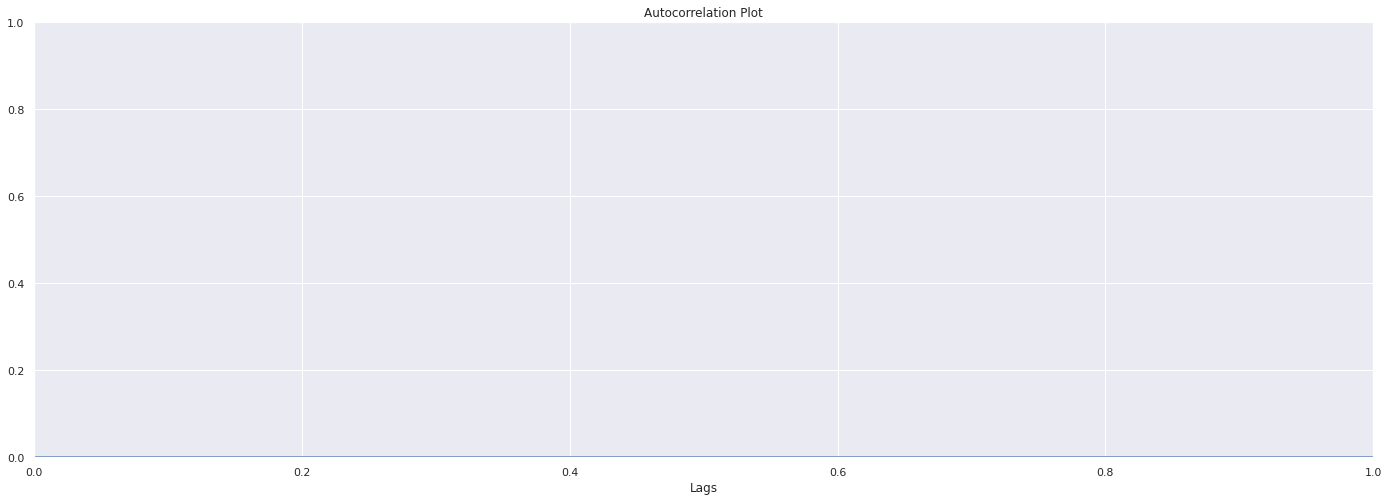

In [42]:
# Adding plot title.
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(df['Close'], maxlags = 20)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [43]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#Check the following factors in the data
###Trend, Seasonality, Irregularity, Cyclic

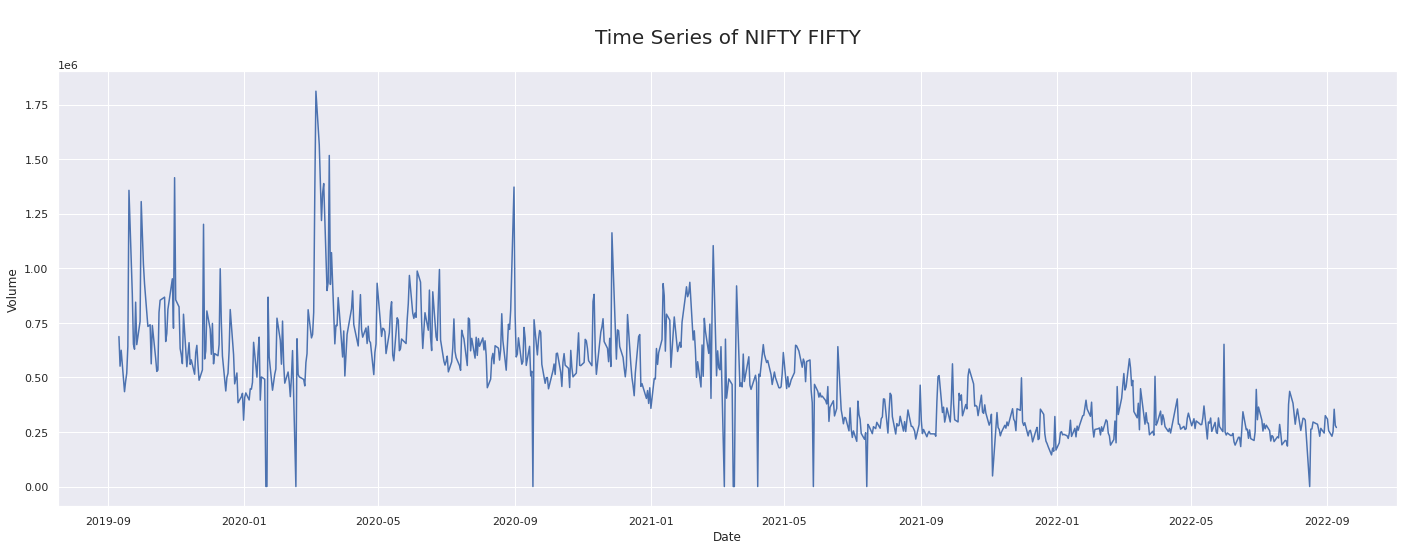

In [44]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='Date',y='Volume')
ax.axes.set_title("\nTime Series of NIFTY FIFTY\n",fontsize=20);

##Patterns Recognition - Trend
A trend is observed when there is an increasing or decreasing slope observed in the time series.

<b>Linear Trend</b> : Maintains a straight line.<br>
<b>Polynomial Trend</b> : Shows polynomial curves.<br>
<b>Exponential Trend</b> : Shows exponential growths or fall.<br>
<b>Log-based Trend</b> : Shows log-based growths or fall.

#How to detrend a time series?
Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

In [45]:
df3=df.asfreq('d')

In [46]:
df3.isna().sum()

Open         352
High         352
Low          352
Close        352
Adj Close    352
Volume       352
dtype: int64

In [47]:
for col_name in df3.columns:
  mean_val=df[col_name].mean()
  df3[col_name].fillna(value=mean_val,inplace=True)

In [48]:
df3.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

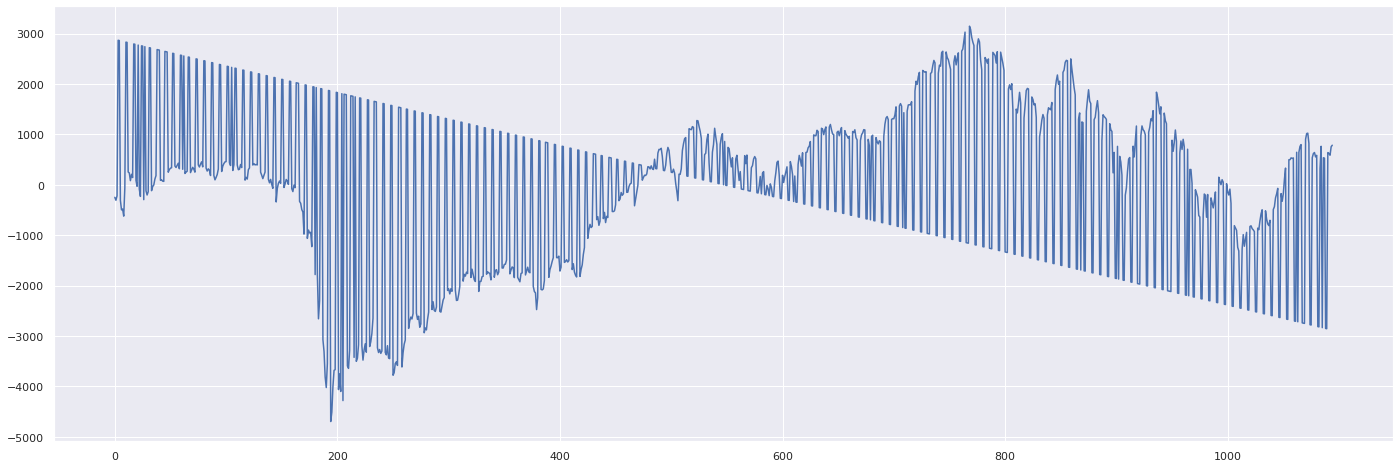

In [49]:
from scipy import signal
detrended = signal.detrend(df3['Close'])
plt.plot(detrended)
# plt.figure(figsize=(20,8))

#Patterns Recognition - Seasonality
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.<br>

<b>Yearly</b> : Example - Black Friday and chrismas Sales<br>
<b>Monthly</b> : Example - We may find big sales on first week of the month as slalry is paid that time

#How to deseasonalize a time series?
There are multiple approaches to deseasonalize a time series as well. Below are a few:<br>

1. Take a moving average with length 
as the seasonal window. This will smoothen in series in the process.<br>
2. Seasonal difference the series (subtract the value of previous season from the current value)
<br>
3. Divide the series by the seasonal index obtained from STL decomposition

[]

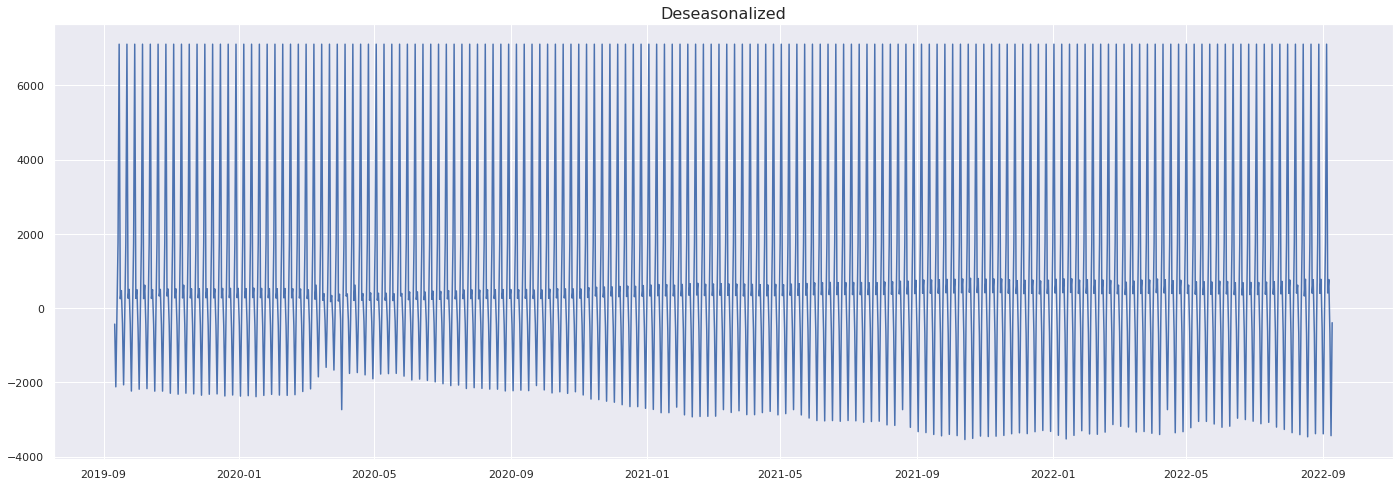

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df3['Close'], model='addtive', extrapolate_trend='freq')
deseasonalized = df3['Close'].values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()

#How to test for seasonality of a time series?
The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:
<br>
Hour of day<br>
Day of month<br>
Weekly<br>
Monthly<br>
Yearly<br>

[]

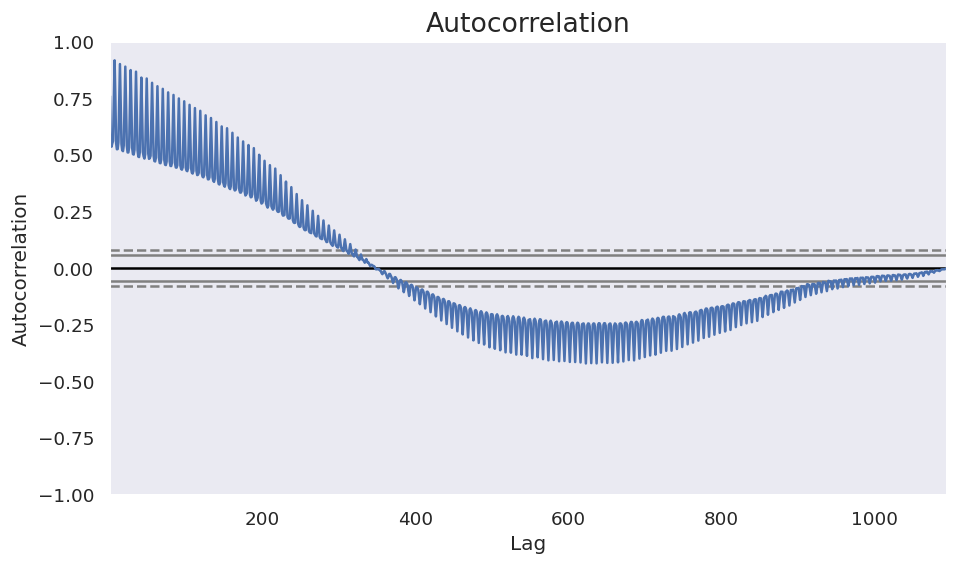

In [51]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df3.Close)
plt.title('Autocorrelation', fontsize=16)
plt.plot()

#How to test for stationarity?
The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

#Augmented Dickey Fuller test (ADH Test)
Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

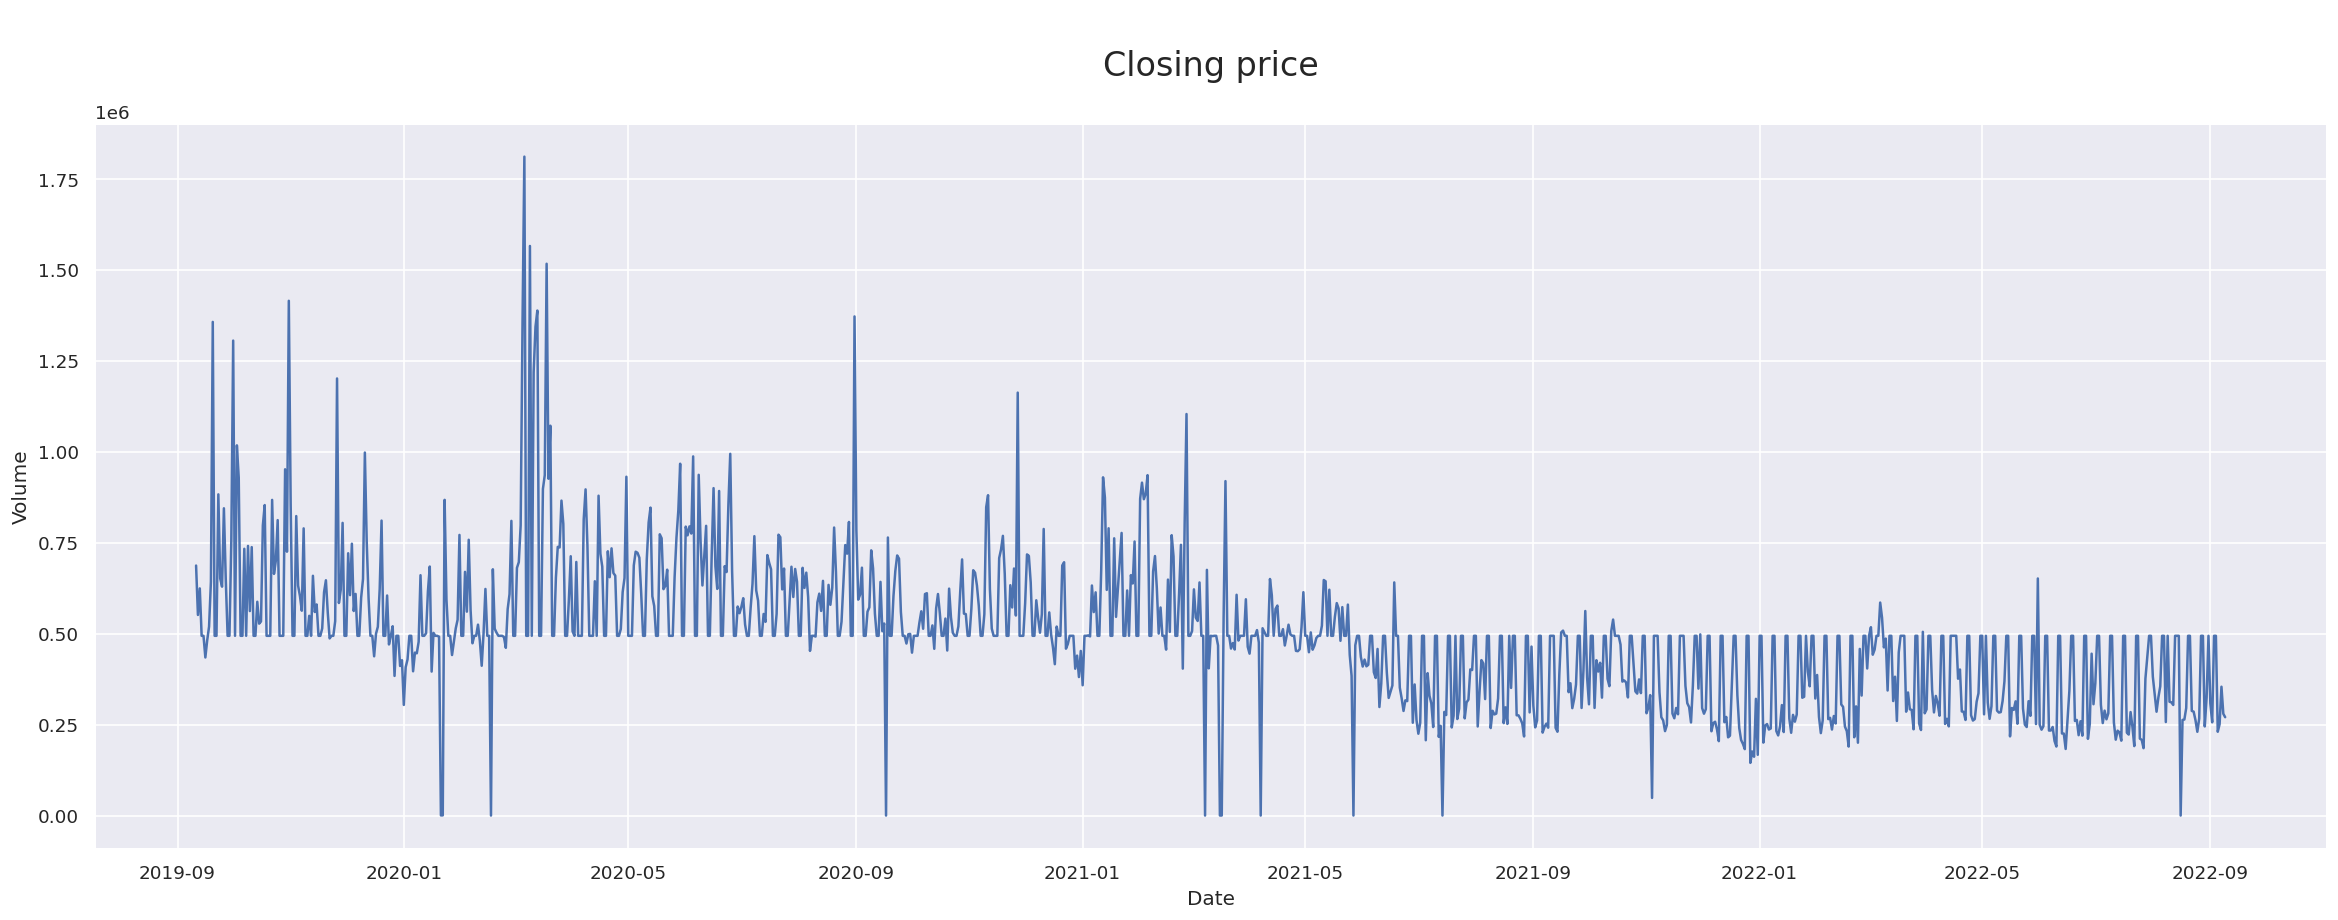

In [52]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df3,x='Date',y='Volume')
ax.axes.set_title("\nClosing price\n",fontsize=20);

#Augmented Dickey Fuller test (ADH Test)

In [53]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-11,11028.500000,11054.799805,11011.650391,11035.700195,11035.700195,687100.00000
2019-09-12,11058.299805,11081.750000,10964.950195,10982.799805,10982.799805,551400.00000
2019-09-13,10986.799805,11084.450195,10945.750000,11075.900391,11075.900391,624300.00000
2019-09-14,14176.902689,14257.538011,14068.056784,14167.027252,14167.027252,494029.60969
2019-09-15,14176.902689,14257.538011,14068.056784,14167.027252,14167.027252,494029.60969


In [54]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df3['Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.5410253017204711
p-value: 0.8837590247930394
Critial Values:
   1%, -3.436459052172655
Critial Values:
   5%, -2.864237372528562
Critial Values:
   10%, -2.568206176974609


#Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

In [55]:
from statsmodels.tsa.stattools import kpss
result = kpss(df3['Close'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 4.176072
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




#What is the difference between white noise and a stationary series?
Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0. In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise. Mathematically, a sequence of completely random numbers with mean zero is a white noise.

#How to treat missing values in a time series?
Some effective alternatives to imputation are:

Backward Fill<br>
Linear Interpolation<br>
Quadratic interpolation<br>
Mean of nearest neighbors<br>
Mean of seasonal couterparts

##Autocorrelation Function (ACF)
Use the autocorrelation function (ACF) to identify which lags have significant correlations, understand the patterns and properties of the time series, and then use that information to model the time series data. From the ACF, you can assess the randomness and stationarity of a time series. You can also determine whether trends and seasonal patterns are present.

In an ACF plot, each bar represents the size and direction of the correlation. Bars that extend across the red line are statistically significant.

##Partial Autocorrelation Function (PACF)
The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

#Plots:- Autocorrelation and Partial Autocorrelation
The term autocorrelation refers to the degree of similarity between A) a given time series, and B) a lagged version of itself, over C) successive time intervals.
<br>In other words, autocorrelation is intended to measure the relationship between a variable's present value and any past values that you may have access to.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



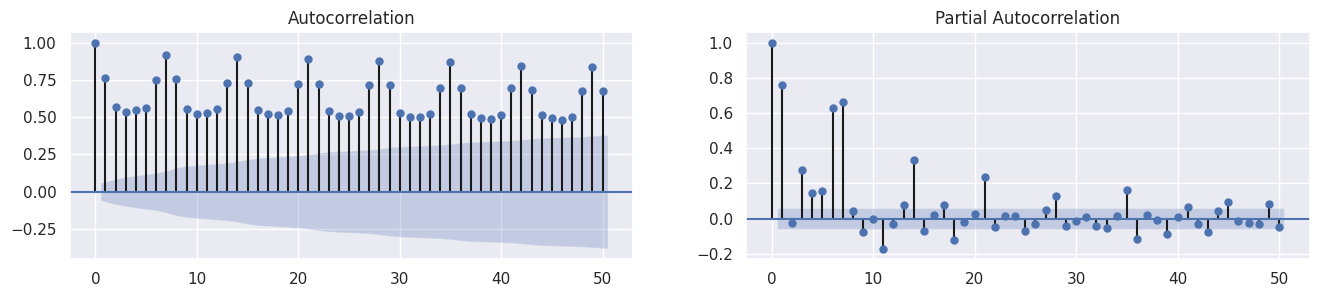

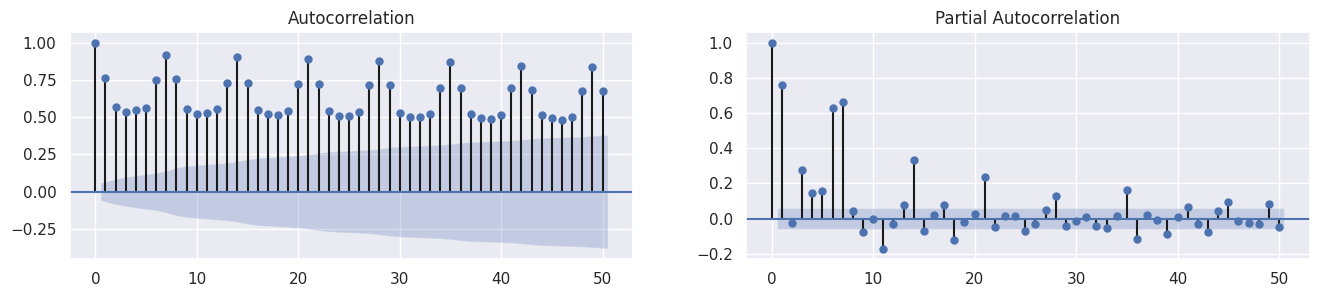

In [56]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_50 = acf(df3.Close, nlags=50)
pacf_50 = pacf(df3.Close, nlags=50)
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df3.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(df3.Close.tolist(), lags=50, ax=axes[1])

## Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation.

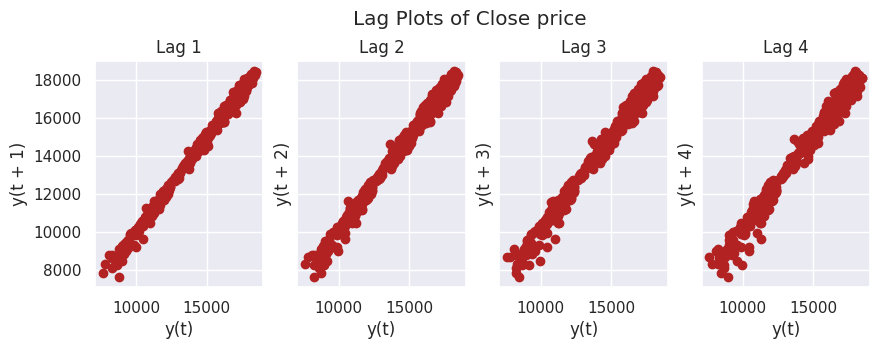

In [57]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Close, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Close price', y=1.05)    
plt.show()

#Smoothing
Smoothening of a time series may be useful in:
Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
The smoothed version of series can be used as a feature to explain the original series itself.
Visualize the underlying trend better<br><br>
So how to smoothen a series? Let’s discuss the following methods:¶
Take a moving average
Do a LOESS smoothing (Localized Regression)
Do a LOWESS smoothing (Locally Weighted Regression)
Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

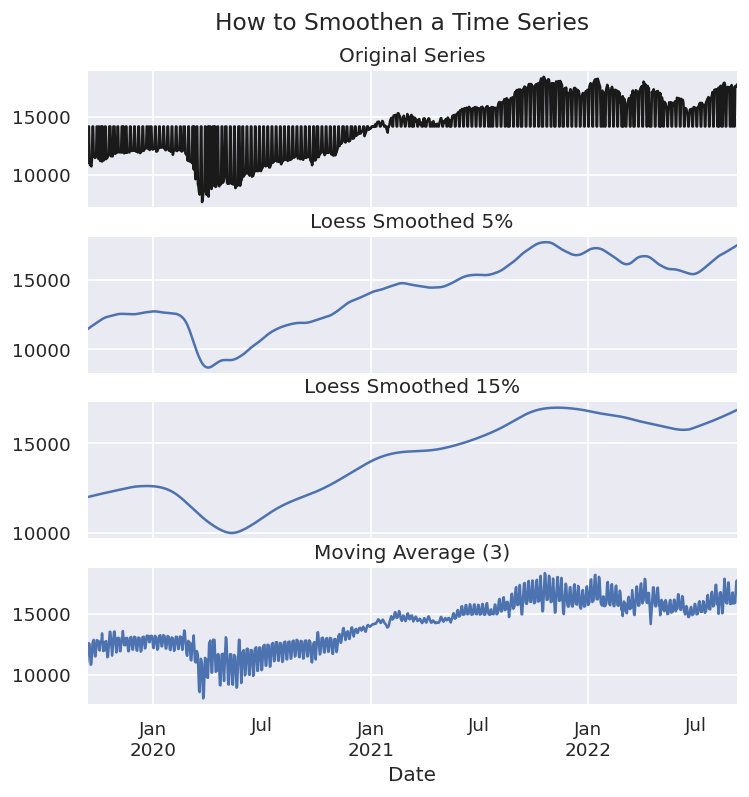

In [58]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
df3['value']=df3['Close']
df_orig=df3.copy()

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()


df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

#Arima Model

In [59]:
series=pd.DataFrame()
series['value']=df3['Close']
series=series.set_index(df3.index)
series.index = pd.to_datetime(series.index)

series

,value
Date,
2019-09-11,11035.700195
2019-09-12,10982.799805
2019-09-13,11075.900391
2019-09-14,14167.027252
2019-09-15,14167.027252
...,...
2022-09-05,17665.800781
2022-09-06,17655.599609
2022-09-07,17624.400391


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1095
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9220.223
Date:                Sun, 09 Oct 2022   AIC                          18452.446
Time:                        12:44:54   BIC                          18482.432
Sample:                    09-11-2019   HQIC                         18463.793
                         - 09-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3613      0.018    -20.228      0.000      -0.396      -0.326
ar.L2         -0.6012      0.016    -38.762      0.000      -0.632      -0.571
ar.L3         -0.5191      0.018    -29.067      0.0

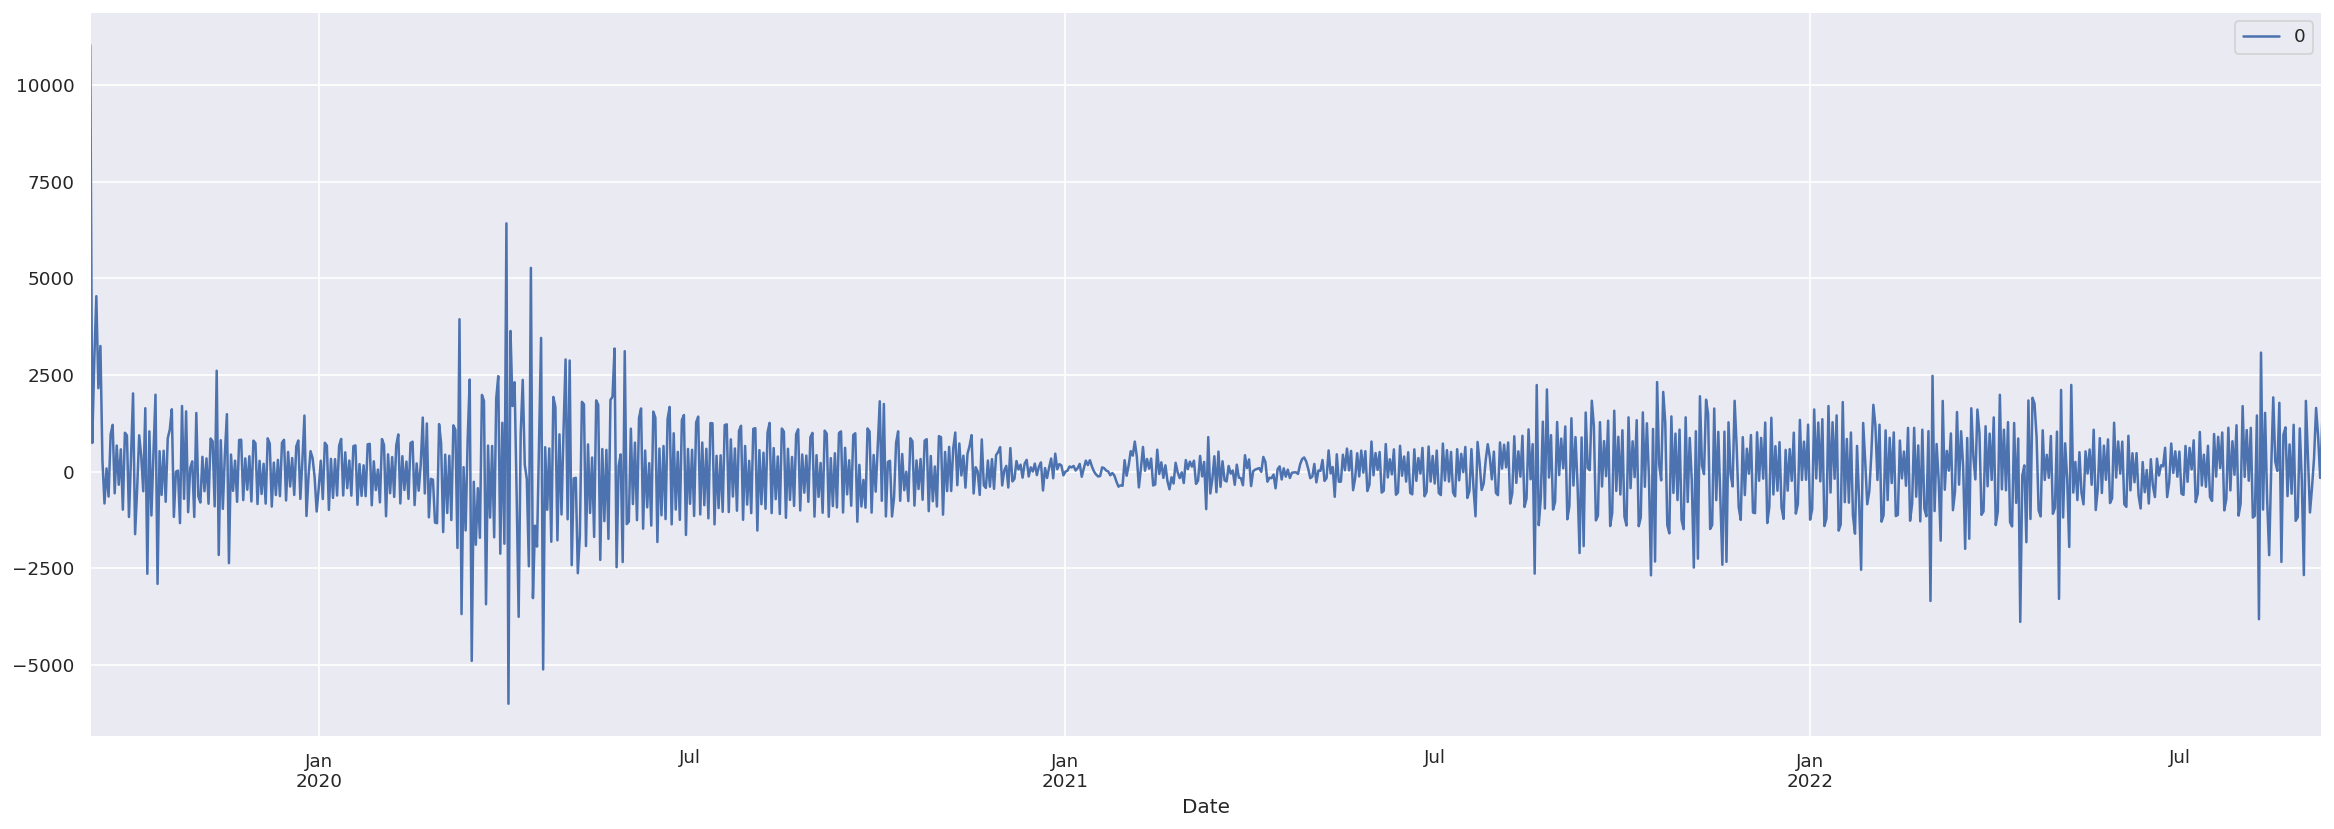

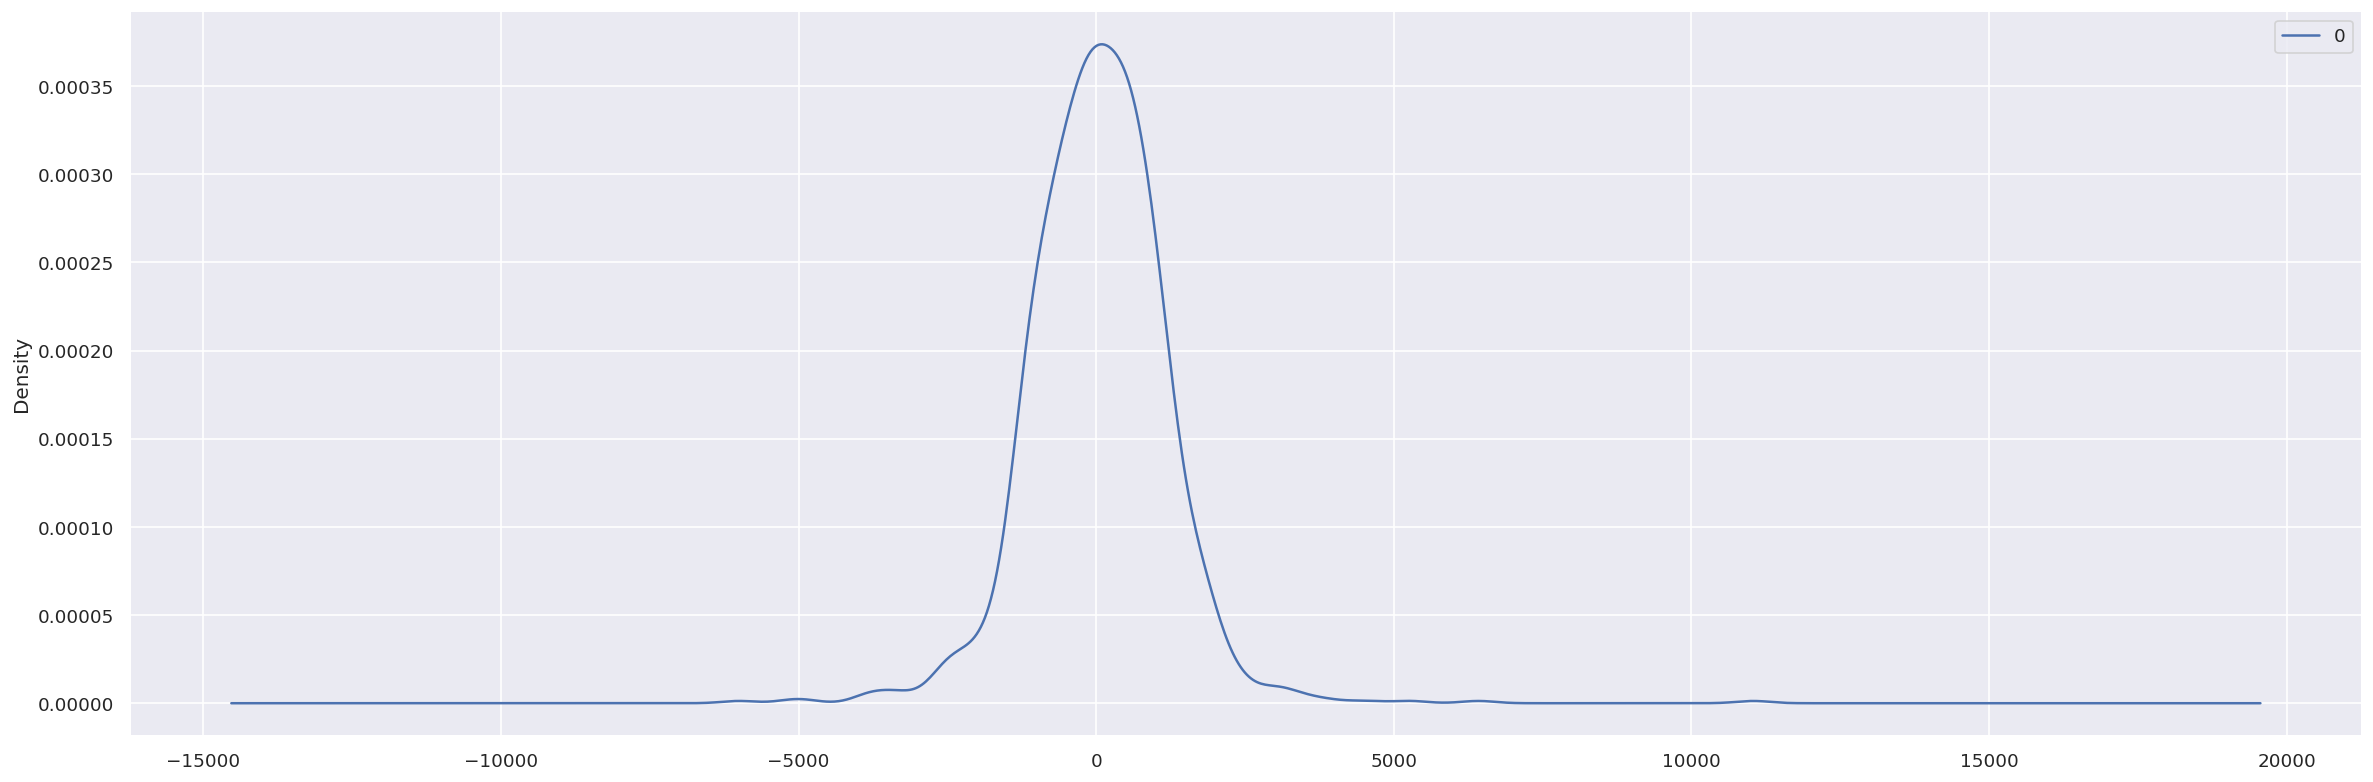

                  0
count   1095.000000
mean      38.824378
std     1160.467110
min    -6007.185296
25%     -638.474143
50%       47.971751
75%      722.808410
max    11035.700195


In [60]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())